In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
murder_data = pd.read_csv("homicide.csv")
murder_data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
murder_data.shape

(638454, 24)

In [5]:
 for i in murder_data.columns:
        print(i,end="   ")

Record ID   Agency Code   Agency Name   Agency Type   City   State   Year   Month   Incident   Crime Type   Crime Solved   Victim Sex   Victim Age   Victim Race   Victim Ethnicity   Perpetrator Sex   Perpetrator Age   Perpetrator Race   Perpetrator Ethnicity   Relationship   Weapon   Victim Count   Perpetrator Count   Record Source   

# Q1.number of incidents per states per year??

In [6]:
inc_per_state_per_year = murder_data.groupby(["State","Year"])["Record ID"].size().reset_index()
inc_per_state_per_year = inc_per_state_per_year.sort_values(by="Record ID",ascending=False)
inc_per_state_per_year.head()
#df.groupby([state,year][record_id]).count().nlargest

,State,Year,Record ID
152,California,1993,4369
151,California,1992,4195
150,California,1991,4146
153,California,1994,3962
149,California,1990,3862


In [7]:
inc_per_state_per_year2 = murder_data.groupby(["State","Year"])["Record ID"].count().nlargest(2).reset_index()
inc_per_state_per_year2

,State,Year,Record ID
0,California,1993,4369
1,California,1992,4195


In [8]:
inc_per_state_per_year2 = murder_data.groupby(["State","Year"])["Record ID"].count().nsmallest(2).reset_index()
inc_per_state_per_year2

,State,Year,Record ID
0,Alabama,2014,1
1,District of Columbia,2001,1


# Q2.Which month wifes have more tendancy to hurt husband???

In [34]:
month_wise_murder = murder_data[["Month","Relationship","Perpetrator Sex","Victim Sex","Record ID"]]
month_wise_murder = month_wise_murder[month_wise_murder["Perpetrator Sex"]=="Female"]
month_wise_murder_husband = month_wise_murder[month_wise_murder["Victim Sex"]=="Male"]
month_wise_murder_husband = month_wise_murder[month_wise_murder["Relationship"]=="Husband"]
month_wise_murder_husband.head()

,Month,Relationship,Perpetrator Sex,Victim Sex,Record ID
27,February,Husband,Female,Male,28
46,December,Husband,Female,Male,47
48,March,Husband,Female,Male,49
51,June,Husband,Female,Male,52
53,July,Husband,Female,Male,54


In [35]:
month_wise_murder_husband = month_wise_murder_husband.groupby("Month")["Record ID"].size().reset_index()
#month_wise_murder_husband = month_wise_murder_husband.sort_values(ascending=False)
month_wise_murder_husband = month_wise_murder_husband.sort_values(by="Record ID",ascending=False)
month_wise_murder_husband.head()

,Month,Record ID
5,July,829
2,December,770
6,June,762
1,August,758
8,May,741


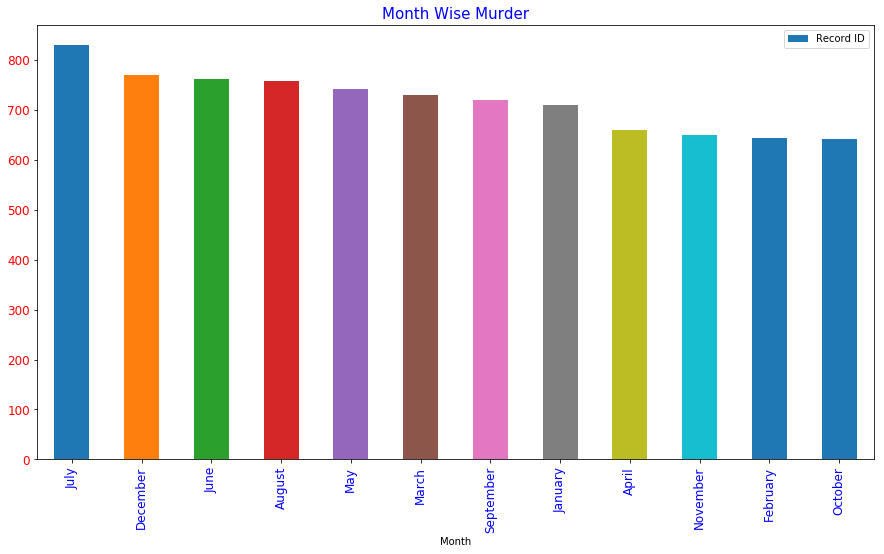

In [58]:
month_wise_murder_husband.plot(kind="bar",x="Month",y="Record ID",figsize=[15,8])
plt.title("Month Wise Murder",fontsize=15,color="b")
plt.xticks(color="blue",fontsize=12)
plt.yticks(color="r",fontsize=12)
plt.show()

# NOTE:
from the above data jully month has the higher no of murder tendency

# Q3.no of incident involvong ex-husband vs ex-wife(older or younger)

In [11]:
#murder againest husband or murder againest wife
exhusband_exwife = murder_data[["Relationship","Perpetrator Sex","Victim Sex","Record ID"]]
exhusband_exwife = exhusband_exwife[((exhusband_exwife["Perpetrator Sex"]=="Female") & (exhusband_exwife["Victim Sex"]=="Male") & (exhusband_exwife["Relationship"]=="Ex-Husband")) | ((exhusband_exwife["Perpetrator Sex"]=="Male") & (exhusband_exwife["Victim Sex"]=="Female") & (exhusband_exwife["Relationship"]=="Ex-Wife"))]


len(exhusband_exwife)

2428

# NOTE:
From the above we have observed that 2428 such incident are there where both ex-husband and ex-wife are involve

In [12]:
total_crime1 = murder_data[["Relationship","Perpetrator Sex","Victim Sex","Record ID"]]
total_crime1 = total_crime1[(total_crime1["Victim Sex"]=="Male")&(total_crime1["Perpetrator Sex"]=="Female")&(total_crime1["Relationship"]=="Ex-Husband")|(total_crime1["Victim Sex"]=="Female")&(total_crime1["Perpetrator Sex"]=="Male")&(total_crime1["Relationship"]=="Ex-Wife")]
total_crime1.head()

,Relationship,Perpetrator Sex,Victim Sex,Record ID
15,Ex-Husband,Female,Male,16
120,Ex-Wife,Male,Female,121
162,Ex-Husband,Female,Male,163
296,Ex-Wife,Male,Female,297
329,Ex-Wife,Male,Female,330


# Q4.Number of incident between employee and employer??

In [13]:
empl_record = murder_data[['Relationship','Record ID']]
empl_record.head()

,Relationship,Record ID
0,Acquaintance,1
1,Acquaintance,2
2,Unknown,3
3,Acquaintance,4
4,Unknown,5


In [14]:
empl_record1 = empl_record[(empl_record.Relationship=="Employee")|(empl_record.Relationship=="Employer")]
#empl_record1 = empl_record1.groupby("Relationship")["Record ID"].size()
empl_record1["Record ID"].count()

893

# NOTE:
Above 893 are the no of incident involved both employee and employeer

In [15]:
#there are total 893 no employee between employer
empl_record1 = empl_record1.groupby("Relationship")["Record ID"].size()
empl_record1

Relationship
Employee    384
Employer    509
Name: Record ID, dtype: int64

# Q5.Number of incident based on family relationship(ex:wife killed by husband)?

In [4]:
family = ['Brother','Sister','Mother','Son','Daughter','Husband','Wife','Father']
relation_family= murder_data[murder_data['Relationship'].isin(family)]
relation_family.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
17,18,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980,November,1,Murder or Manslaughter,...,Unknown,Male,23,Native American/Alaska Native,Unknown,Brother,Blunt Object,0,1,FBI
19,20,AK00113,Bethel,Municipal Police,Bethel,Alaska,1980,February,1,Murder or Manslaughter,...,Unknown,Male,35,Native American/Alaska Native,Unknown,Brother,Handgun,0,0,FBI
23,24,AK00118,North Slope Borough,County Police,North Slope,Alaska,1980,July,1,Manslaughter by Negligence,...,Unknown,Male,41,Unknown,Unknown,Wife,Blunt Object,0,0,FBI


In [5]:
def relationship(data):
    if ((data['Relationship'] == 'Brother') & (data['Perpetrator Sex'] == 'Male')):
            return "Brother killed by brother"
    elif ((data['Relationship'] == 'Brother') & (data['Perpetrator Sex'] == 'Female')):
            return "Brother killed by sister"
    elif ((data['Relationship'] == 'Sister') & (data['Perpetrator Sex'] == 'Male')):
            return "Sister killed by brother"
    elif ((data['Relationship'] == 'Sister') & (data['Perpetrator Sex'] == 'Female')):
            return "Sister killed by sister"
    elif ((data['Relationship'] == 'Mother') & (data['Perpetrator Sex'] == 'Male')):
            return "Mother killed by son"
    elif ((data['Relationship'] == 'Mother') & (data['Perpetrator Sex'] == 'Female')):
            return "Mother killed by daughter"
    elif ((data['Relationship'] == 'Father') & (data['Perpetrator Sex'] == 'Male')):
            return "Father killed by son"
    elif ((data['Relationship'] == 'Father') & (data['Perpetrator Sex'] == 'Female')):
            return "Father killed by daughter"
    elif ((data['Relationship'] == 'Son') & (data['Perpetrator Sex'] == 'Male')):
            return "Son killed by father"
    elif ((data['Relationship'] == 'Son') & (data['Perpetrator Sex'] == 'Female')):
            return "Son killed by mother"
    elif ((data['Relationship'] == 'Daughter') & (data['Perpetrator Sex'] == 'Male')):
            return "Daughter killed by father"
    elif ((data['Relationship'] == 'Daughter') & (data['Perpetrator Sex'] == 'Female')):
            return "Daughter killed by mother"
    elif ((data['Relationship'] == 'Husband') & (data['Perpetrator Sex'] == 'Female')):
            return "Husband killed by wife"
    elif ((data['Relationship'] == 'Wife') & (data['Perpetrator Sex'] == 'Male')):
            return "Wife killed by husband"
    else :
        return "Unknown"    

In [6]:
newdf = pd.DataFrame()

for i, df in relation_family.iterrows():
    cur_row = pd.Series({"Record ID" : df['Record ID'],"Murder_By" :relationship(df)})
    newdf = newdf.append(cur_row, ignore_index=True)

In [10]:
newdf.head(2)

,Murder_By,Record ID
0,Wife killed by husband,7.0
1,Wife killed by husband,8.0


In [8]:
#merging two data frame
relation_family = relation_family.merge(newdf)

In [11]:
relation_family.head(2)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Murder_By
0,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Male,27,Black,Unknown,Wife,Knife,0,0,FBI,Wife killed by husband
1,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Male,35,White,Unknown,Wife,Knife,0,0,FBI,Wife killed by husband


In [14]:
relation_family = relation_family.groupby("Murder_By")["Record ID"].size().sort_values(ascending=False)
relation_family

Murder_By
Wife killed by husband       23058
Husband killed by wife        8614
Son killed by father          5983
Brother killed by brother     5016
Daughter killed by father     3884
Father killed by son          3880
Son killed by mother          3859
Daughter killed by mother     3603
Mother killed by son          3551
Sister killed by brother      1037
Mother killed by daughter      687
Brother killed by sister       480
Father killed by daughter      473
Unknown                        472
Sister killed by sister        251
Name: Record ID, dtype: int64

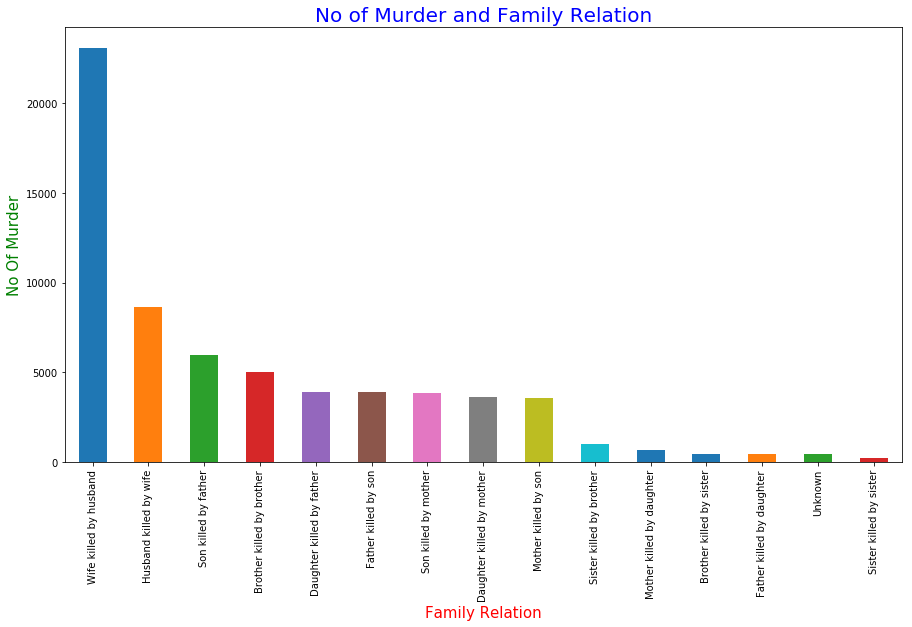

In [23]:
relation_family.plot(kind="bar",figsize=[15,8])
plt.title("No of Murder and Family Relation",fontsize=20,color="b")
plt.xlabel("Family Relation",fontsize=15,color="r")
plt.ylabel("No Of Murder",fontsize=15,color="g")
plt.show()

# Q6.Gender wise weapon used in the incidents??????

In [25]:
weapon_gender_wise = murder_data.groupby(["Perpetrator Sex","Weapon"]).size().reset_index()
weapon_gender_wise = weapon_gender_wise.sort_values(by=0,ascending=False)


In [26]:
weapon_gender_wise=weapon_gender_wise.rename(columns={0:"COUNT"})
weapon_gender_wise = weapon_gender_wise[weapon_gender_wise["Perpetrator Sex"] !="Unknown"]
weapon_gender_wise_top_10 = weapon_gender_wise.head(10)

In [27]:
#these are the top 10 weapon count and user gender
weapon_gender_wise_top_10

,Perpetrator Sex,Weapon,COUNT
24,Male,Handgun,199776
25,Male,Knife,61015
16,Male,Blunt Object,45782
28,Male,Shotgun,24307
22,Male,Firearm,23103
27,Male,Rifle,18486
8,Female,Handgun,17107
31,Male,Unknown,14722
9,Female,Knife,13748
0,Female,Blunt Object,5722


### ANS:

from the above it is seen that "Handgun "  and "Knife"is used most of the time where perpetrator sex is male,
and for female same "handgun" and "knife" is also most frequent used weapon

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

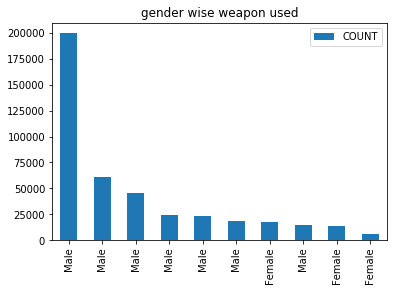

In [29]:
import seaborn as sns
weapon_gender_wise_top_10.plot(kind="bar",title="gender wise weapon used")
plt.xticks(ticks= list(range(10)),labels=weapon_gender_wise_top_10["Perpetrator Sex"])
plt.show()

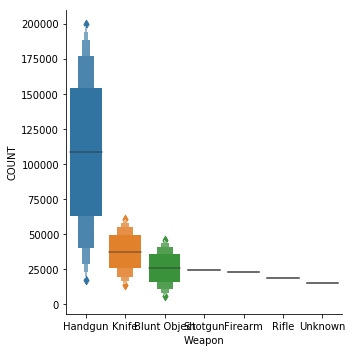

In [30]:
sns.catplot(x="Weapon", y="COUNT", kind="boxen",data=weapon_gender_wise_top_10)

# ==========================END==============================